# **ANALISIS SENTIMEN KOMENTAR YOUTUBE TENTANG PENUTUPAN TIKTOK SHOP MENGGUNAKAN PERBANDINGAN METODE NAIVE BAYES DAN DECISION TREE**

## Awalan

### Import Library

In [ ]:
import pandas as pd
import string
import numpy as np

### Dataset

In [ ]:
#@markdown jalur file atau link/URL ke dataset dalam bentuk google spreadsheet
filepath = "https://docs.google.com/spreadsheets/d/1xsx3f4lJBswSe39yxzvl7_k6M1OTSnSrJt5lpmIEyDA/gviz/tq?tqx=out:csv" #@param

In [ ]:
#@markdown buat dataframe pandas dari file csv dan tampilkan 5 data teratas
df_review = pd.read_csv(filepath)
del df_review['clean_review']
df_review.head(5)

,publishedAt,authorDisplayName,textDisplay,likeCount,label
0,2023-11-14T03:32:13Z,@yanglucu-lucu4280,Partai PAN SI ZUL NIH. BELUM JADI PRESIDEN AJA...,0.0,negatif
1,2023-10-30T08:37:26Z,@umbetchannel2844,mohon game-game juga di tutupanakku saja sampa...,0.0,negatif
2,2023-10-28T07:57:03Z,@kageming8926,jujur setelah tiktok shop di tutup Uang semaki...,0.0,netral
3,2023-10-27T08:21:18Z,@bayunugroho9197,Pemerintah cuma minta urus ijin ya kali nyedot...,0.0,negatif
4,2023-10-27T02:43:15Z,@agungabdillah4557,Menutup tiktokshop supaya pasar tanah abang ra...,0.0,negatif


### Fitur Dan Label

In [ ]:
#@markdown inisiasi fitur dan juga label dari kolom yang dipakai
fitur = "textDisplay" #@param
label = "label" #@param

In [ ]:
#@markdown copy dataframe yang sudah dibuat ke dataframe df_preprocessed untuk menjaga keaslian dataset
df_preprocessed = df_review.copy()
df_preprocessed.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,label
0,2023-11-14T03:32:13Z,@yanglucu-lucu4280,Partai PAN SI ZUL NIH. BELUM JADI PRESIDEN AJA...,0.0,negatif
1,2023-10-30T08:37:26Z,@umbetchannel2844,mohon game-game juga di tutupanakku saja sampa...,0.0,negatif
2,2023-10-28T07:57:03Z,@kageming8926,jujur setelah tiktok shop di tutup Uang semaki...,0.0,netral
3,2023-10-27T08:21:18Z,@bayunugroho9197,Pemerintah cuma minta urus ijin ya kali nyedot...,0.0,negatif
4,2023-10-27T02:43:15Z,@agungabdillah4557,Menutup tiktokshop supaya pasar tanah abang ra...,0.0,negatif


## Text Preprocessing

### Cleansing, Case Folding

In [ ]:
import string, re

#@markdown ini adalah fungsi cleansing() untuk melakukan cleansing, dimana dalam fungsi ini menghapus punctuation, ASCII, unicode dan garis baru setelah itu fungsi ini mengembalikan data dalam bentuk string
def cleansing(data):
  #lower text
  # data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [ ]:
#@markdown kode ini menerapkan fungsi cleansing pada kolom baru
review =[]
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row[fitur]))

df_preprocessed[fitur + "_Cleansing"] = review
df_preprocessed.head()


,publishedAt,authorDisplayName,textDisplay,likeCount,label,textDisplay_Cleansing
0,2023-11-14T03:32:13Z,@yanglucu-lucu4280,Partai PAN SI ZUL NIH. BELUM JADI PRESIDEN AJA...,0.0,negatif,Partai PAN SI ZUL NIH BELUM JADI PRESIDEN AJA...
1,2023-10-30T08:37:26Z,@umbetchannel2844,mohon game-game juga di tutupanakku saja sampa...,0.0,negatif,mohon game game juga di tutupanakku saja sampa...
2,2023-10-28T07:57:03Z,@kageming8926,jujur setelah tiktok shop di tutup Uang semaki...,0.0,netral,jujur setelah tiktok shop di tutup Uang semaki...
3,2023-10-27T08:21:18Z,@bayunugroho9197,Pemerintah cuma minta urus ijin ya kali nyedot...,0.0,negatif,Pemerintah cuma minta urus ijin ya kali nyedot...
4,2023-10-27T02:43:15Z,@agungabdillah4557,Menutup tiktokshop supaya pasar tanah abang ra...,0.0,negatif,Menutup tiktokshop supaya pasar tanah abang ra...


In [ ]:
#@markdown kode ini menerapkan Case Folding untuk membuat semua huruf memiliki format lowercase pada kolom baru
review =[]
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row[fitur]).lower())

df_preprocessed[fitur + "_Case_Folding"] = review
df_preprocessed.head()


,publishedAt,authorDisplayName,textDisplay,likeCount,label,textDisplay_Cleansing,textDisplay_Case_Folding
0,2023-11-14T03:32:13Z,@yanglucu-lucu4280,Partai PAN SI ZUL NIH. BELUM JADI PRESIDEN AJA...,0.0,negatif,Partai PAN SI ZUL NIH BELUM JADI PRESIDEN AJA...,partai pan si zul nih belum jadi presiden aja...
1,2023-10-30T08:37:26Z,@umbetchannel2844,mohon game-game juga di tutupanakku saja sampa...,0.0,negatif,mohon game game juga di tutupanakku saja sampa...,mohon game game juga di tutupanakku saja sampa...
2,2023-10-28T07:57:03Z,@kageming8926,jujur setelah tiktok shop di tutup Uang semaki...,0.0,netral,jujur setelah tiktok shop di tutup Uang semaki...,jujur setelah tiktok shop di tutup uang semaki...
3,2023-10-27T08:21:18Z,@bayunugroho9197,Pemerintah cuma minta urus ijin ya kali nyedot...,0.0,negatif,Pemerintah cuma minta urus ijin ya kali nyedot...,pemerintah cuma minta urus ijin ya kali nyedot...
4,2023-10-27T02:43:15Z,@agungabdillah4557,Menutup tiktokshop supaya pasar tanah abang ra...,0.0,negatif,Menutup tiktokshop supaya pasar tanah abang ra...,menutup tiktokshop supaya pasar tanah abang ra...


In [ ]:
text = df_preprocessed[fitur].iloc[110]
print(cleansing(text).lower())

banyak yg kaya mendadak semenjak ada tiktok shop sampai quot  ada yg beliin mobil untuk para staf nya


### Tokenizing

In [ ]:
#@markdown ini adalah fungsi melakukan tokenizing atau mengubah string menjadi list kata
def tokenize(text):
  # Memisahkan kata-kata
  tokens = text.split()

  # Mengembalikan list of tokens
  return tokens

# Contoh penggunaan
text = "Ini adalah contoh kalimat yang ingin di-tokenize."
tokens = tokenize(text)

print(tokens)


['Ini', 'adalah', 'contoh', 'kalimat', 'yang', 'ingin', 'di-tokenize.']


In [ ]:
#@markdown kode ini menerapkan fungsi tokenize() pada kolom baru
df_preprocessed[fitur + "_tokenizing"] = [tokenize(df_preprocessed[fitur + "_Case_Folding"][i]) for i in range(len(df_preprocessed))]

### Filtering

In [ ]:
#@markdown instalasi library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
#@markdown kode ini adalah inisiasi penghapus stopword dan contoh penggunaannya
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

#contoh
stop = stopword.remove(text)
print(stop)


Ini contoh kalimat ingin di-tokenize.


In [ ]:
#@markdown ini adalah contoh kode penggunaan stopword remover diatas, dari cleansing hingga penghapusan stopword remover
text = df_preprocessed[fitur].iloc[30]
txt = cleansing(text)
text2 = stopword.remove(txt)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)

Awal :  Dampak positif<br>-ancaman project S (menggusur produk lokal dengan menciptakan produk tiongkok) dapat dihindari<br>-membuka peluang toko online dalam negeri<br>-melindungi produk lokal<br><br><br>Negatif<br>-pendapatan seller dan affiliator tiktokshop menghilang seketika<br>-pedagang barang impor impor terancam<br><br>Kesimpulan : saya mendukung
Cleansing :  Dampak positif br  ancaman project S  menggusur produk lokal dengan menciptakan produk tiongkok  dapat dihindari br  membuka peluang toko online dalam negeri br  melindungi produk lokal br  br  br Negatif br  pendapatan seller dan affiliator tiktokshop menghilang seketika br  pedagang barang impor impor terancam br  br Kesimpulan   saya mendukung
Stopword :  Dampak positif br  ancaman project S  menggusur produk lokal menciptakan produk tiongkok  dihindari br  membuka peluang toko online negeri br  melindungi produk lokal br  br  br Negatif br  pendapatan seller affiliator tiktokshop menghilang seketika br  pedagang barang

In [ ]:
#@markdown ini adalah kode untuk menghapus stopword
review = []
for index, row in df_preprocessed.iterrows():
     review.append(stopword.remove(row[fitur + "_Case_Folding"]))

df_preprocessed[fitur + "_Filtering"] = review
df_preprocessed.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,label,textDisplay_Cleansing,textDisplay_Case_Folding,textDisplay_tokenizing,textDisplay_Filtering
0,2023-11-14T03:32:13Z,@yanglucu-lucu4280,Partai PAN SI ZUL NIH. BELUM JADI PRESIDEN AJA...,0.0,negatif,Partai PAN SI ZUL NIH BELUM JADI PRESIDEN AJA...,partai pan si zul nih belum jadi presiden aja...,"[partai, pan, si, zul, nih, belum, jadi, presi...",partai pan si zul nih jadi presiden aja udah ...
1,2023-10-30T08:37:26Z,@umbetchannel2844,mohon game-game juga di tutupanakku saja sampa...,0.0,negatif,mohon game game juga di tutupanakku saja sampa...,mohon game game juga di tutupanakku saja sampa...,"[mohon, game, game, juga, di, tutupanakku, saj...",mohon game game di tutupanakku sampai sakit ga...
2,2023-10-28T07:57:03Z,@kageming8926,jujur setelah tiktok shop di tutup Uang semaki...,0.0,netral,jujur setelah tiktok shop di tutup Uang semaki...,jujur setelah tiktok shop di tutup uang semaki...,"[jujur, setelah, tiktok, shop, di, tutup, uang...",jujur tiktok shop tutup uang semakin pekat
3,2023-10-27T08:21:18Z,@bayunugroho9197,Pemerintah cuma minta urus ijin ya kali nyedot...,0.0,negatif,Pemerintah cuma minta urus ijin ya kali nyedot...,pemerintah cuma minta urus ijin ya kali nyedot...,"[pemerintah, cuma, minta, urus, ijin, ya, kali...",pemerintah cuma minta urus ijin kali nyedot ua...
4,2023-10-27T02:43:15Z,@agungabdillah4557,Menutup tiktokshop supaya pasar tanah abang ra...,0.0,negatif,Menutup tiktokshop supaya pasar tanah abang ra...,menutup tiktokshop supaya pasar tanah abang ra...,"[menutup, tiktokshop, supaya, pasar, tanah, ab...",menutup tiktokshop pasar tanah abang ramai sep...


In [ ]:
#@markdown ini adalah kode untuk melakukan stemming atau mengubah sebuah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
Stemmer = factory.create_stemmer()
#contoh
kalimat = 'Menutup tiktokshop supaya pasar tanah abang ramai sepertinya adalah sebuah kekonyolan yang sia sia, kebiasaan orang sudah berubah, semua penjual mau ga mau harus mengikuti'
katadasar = Stemmer.stem(kalimat)
print(katadasar)

tutup tiktokshop supaya pasar tanah abang ramai seperti adalah buah konyol yang sia sia biasa orang sudah ubah semua jual mau ga mau harus ikut


In [ ]:
#@markdown contoh kode melakukan stemming atau mengubah sebuah kata menjadi kata dasar
text = df_preprocessed[fitur].iloc[28]
txt = cleansing(text).lower()
text2 = stopword.remove(txt)
text3 = Stemmer.stem(text2)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)
print("Stemming : ", text3)

Awal :  Tiktok shop kejahatan ekonomi
Cleansing :  tiktok shop kejahatan ekonomi
Stopword :  tiktok shop kejahatan ekonomi
Stemming :  tiktok shop jahat ekonomi


In [ ]:
#@markdown penerapakan kode stemming terhadap dataset
df_preprocessed[fitur + "_Filtering" ] = [Stemmer.stem(df_preprocessed[fitur + "_Filtering"][i]) for i in range(len(df_preprocessed))]
df_preprocessed.head()

,publishedAt,authorDisplayName,textDisplay,likeCount,label,textDisplay_Cleansing,textDisplay_Case_Folding,textDisplay_tokenizing,textDisplay_Filtering
0,2023-11-14T03:32:13Z,@yanglucu-lucu4280,Partai PAN SI ZUL NIH. BELUM JADI PRESIDEN AJA...,0.0,negatif,Partai PAN SI ZUL NIH BELUM JADI PRESIDEN AJA...,partai pan si zul nih belum jadi presiden aja...,"[partai, pan, si, zul, nih, belum, jadi, presi...",partai pan si zul nih jadi presiden aja udah c...
1,2023-10-30T08:37:26Z,@umbetchannel2844,mohon game-game juga di tutupanakku saja sampa...,0.0,negatif,mohon game game juga di tutupanakku saja sampa...,mohon game game juga di tutupanakku saja sampa...,"[mohon, game, game, juga, di, tutupanakku, saj...",mohon game game di tutupanakku sampai sakit ga...
2,2023-10-28T07:57:03Z,@kageming8926,jujur setelah tiktok shop di tutup Uang semaki...,0.0,netral,jujur setelah tiktok shop di tutup Uang semaki...,jujur setelah tiktok shop di tutup uang semaki...,"[jujur, setelah, tiktok, shop, di, tutup, uang...",jujur tiktok shop tutup uang makin pekat
3,2023-10-27T08:21:18Z,@bayunugroho9197,Pemerintah cuma minta urus ijin ya kali nyedot...,0.0,negatif,Pemerintah cuma minta urus ijin ya kali nyedot...,pemerintah cuma minta urus ijin ya kali nyedot...,"[pemerintah, cuma, minta, urus, ijin, ya, kali...",perintah cuma minta urus ijin kali nyedot uang...
4,2023-10-27T02:43:15Z,@agungabdillah4557,Menutup tiktokshop supaya pasar tanah abang ra...,0.0,negatif,Menutup tiktokshop supaya pasar tanah abang ra...,menutup tiktokshop supaya pasar tanah abang ra...,"[menutup, tiktokshop, supaya, pasar, tanah, ab...",tutup tiktokshop pasar tanah abang ramai seper...


In [ ]:
#@markdown fungsi preprocess_data() adalah fungsi text preprocessing yang lengkap dari kode-kode preprocessing sebelumnya
def preprocess_data(data):
  # cleansing data
  data = cleansing(data).lower()

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  #data = vectorizer.transform([data])
  return data

In [ ]:
#@markdown contoh penggunaan fungsi preprocess_data()
text = df_preprocessed[fitur].iloc[33]
print("text asli : ",text)
print("text prepocess : ",preprocess_data(text))

text asli :  Orang ini keturunan dari chinajelas dia tidak setuju tiktok shop di tutup.
text prepocess :  orang turun chinajelas tidak tuju tiktok shop tutup


In [ ]:
df_eval = pd.DataFrame({
    'split_data' : ['80:20', '70:30', '60:40'],
    'Akurasi Decision Tree' : [0.0] * 3,
    'Akurasi Naive Bayes' : [0.0] * 3
})

## Decision Tree Dan Naive Bayes pada formasi Split Data 80%:20%
Ini adalah percobaan komparasi antara algoritma decision tree dan naive bayes pada formasi split data 80:20 atau data training 80% dari dataset sedangkan data test 20% dari dataset

### membagi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_preprocessed[fitur + "_Filtering"],df_preprocessed[label],
                                                   test_size=0.2, stratify=df_preprocessed[label], random_state=0)

### pembobotan TFIDF

In [ ]:
#@title inisiasi pembobotan tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [ ]:
#@title pembobotan TFIDF pada x_train dan x_test
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_test.shape)
print(x_test.shape)

(1571, 11357)
(1571, 11357)


In [ ]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Decision Tree

In [ ]:
#@title training model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#@title prediksi x_test yang ditampung ke y_pred
y_pred = tree.predict(x_test)

In [ ]:
algo = ["Decision Tree", "Naive Bayes"]
split_data_form = {
    "80:20" : 0,
    "70:30" : 1,
    "60:40" : 2
}
df_eval['Akurasi ' + algo[0]][split_data_form["80:20"]] = accuracy_score(y_test, y_pred)

<ipython-input-28-d90c1e565030>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Akurasi ' + algo[0]][split_data_form["80:20"]] = accuracy_score(y_test, y_pred)


In [ ]:
print('Akurasi Decision Tree : %s ' %accuracy_score(y_test, y_pred))

Akurasi Decision Tree : 0.5996180776575429 


In [ ]:
#@title evaluasi model
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[505 153  98]
 [162 278  70]
 [ 90  56 159]]
              precision    recall  f1-score   support

     negatif       0.67      0.67      0.67       756
      netral       0.57      0.55      0.56       510
     positif       0.49      0.52      0.50       305

    accuracy                           0.60      1571
   macro avg       0.57      0.58      0.58      1571
weighted avg       0.60      0.60      0.60      1571



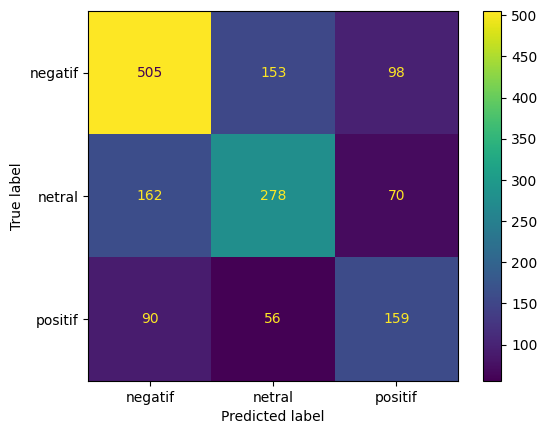

In [ ]:
#@title plotting confussion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = df_preprocessed['label'].unique().tolist())
cm_display.plot()
plt.show()

### Naive Bayes

In [ ]:
#@title training model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#@title prediksi x_test yang ditampung ke y_pred
y_pred = nb.predict(x_test)

In [ ]:
algo = ["Decision Tree", "Naive Bayes"]
split_data_form = {
    "80:20" : 0,
    "70:30" : 1,
    "60:40" : 2
}
df_eval['Akurasi ' + algo[1]][split_data_form["80:20"]] = accuracy_score(y_test, y_pred)

<ipython-input-34-8497d433b4e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Akurasi ' + algo[1]][split_data_form["80:20"]] = accuracy_score(y_test, y_pred)


In [ ]:
print('Akurasi Naive Bayes : %s ' %accuracy_score(y_test, y_pred))

Akurasi Naive Bayes : 0.5518777848504137 


In [ ]:
#@title evaluasi model
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[749   7   0]
 [435  73   2]
 [250  10  45]]
              precision    recall  f1-score   support

     negatif       0.52      0.99      0.68       756
      netral       0.81      0.14      0.24       510
     positif       0.96      0.15      0.26       305

    accuracy                           0.55      1571
   macro avg       0.76      0.43      0.39      1571
weighted avg       0.70      0.55      0.46      1571



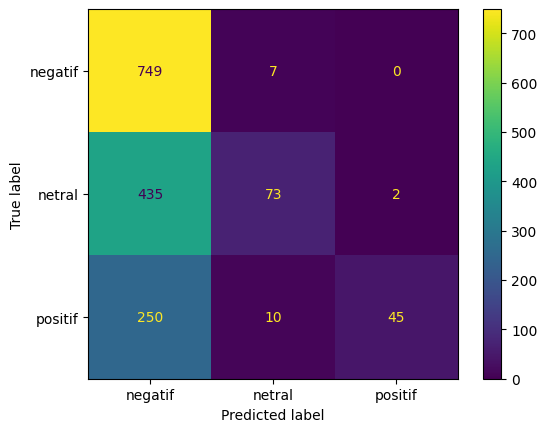

In [ ]:
#@title plotting confussion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = df_preprocessed['label'].unique().tolist())
cm_display.plot()
plt.show()

## Decision Tree Dan Naive Bayes pada formasi Split Data 70%:30%
Ini adalah percobaan komparasi antara algoritma decision tree dan naive bayes pada formasi split data 70:30 atau data training 70% dari dataset sedangkan data test 30% dari dataset

### membagi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_preprocessed[fitur + "_Filtering"],df_preprocessed[label],
                                                   test_size=0.3, stratify=df_preprocessed[label], random_state=0)

### pembobotan TFID

In [ ]:
#@title inisiasi pembobotan tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [ ]:
#@title pembobotan TFIDF pada x_train dan x_test
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_test.shape)
print(x_test.shape)

(2357, 10476)
(2357, 10476)


In [ ]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Decision Tree

In [ ]:
#@title training model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#@title prediksi x_test yang ditampung ke y_pred
y_pred = tree.predict(x_test)

In [ ]:
algo = ["Decision Tree", "Naive Bayes"]
split_data_form = {
    "80:20" : 0,
    "70:30" : 1,
    "60:40" : 2
}
df_eval['Akurasi ' + algo[0]][split_data_form["70:30"]] = accuracy_score(y_test, y_pred)

<ipython-input-44-37d2d7aec849>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Akurasi ' + algo[0]][split_data_form["70:30"]] = accuracy_score(y_test, y_pred)


In [ ]:
print('Akurasi Decision Tree : %s ' %accuracy_score(y_test, y_pred))

Akurasi Decision Tree : 0.5829444208739923 


In [ ]:
#@title evaluasi model
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[700 271 163]
 [227 439 100]
 [141  81 235]]
              precision    recall  f1-score   support

     negatif       0.66      0.62      0.64      1134
      netral       0.55      0.57      0.56       766
     positif       0.47      0.51      0.49       457

    accuracy                           0.58      2357
   macro avg       0.56      0.57      0.56      2357
weighted avg       0.59      0.58      0.58      2357



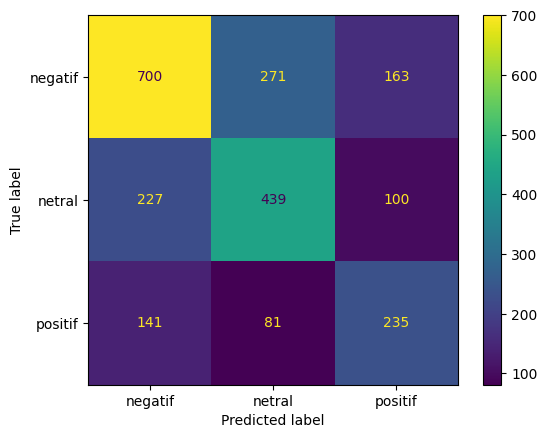

In [ ]:
#@title plotting confussion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = df_preprocessed['label'].unique().tolist())
cm_display.plot()
plt.show()

### Naive Bayes

In [ ]:
#@title training model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#@title prediksi x_test yang ditampung ke y_pred
y_pred = nb.predict(x_test)

In [ ]:
algo = ["Decision Tree", "Naive Bayes"]
split_data_form = {
    "80:20" : 0,
    "70:30" : 1,
    "60:40" : 2
}
df_eval['Akurasi ' + algo[1]][split_data_form["70:30"]] = accuracy_score(y_test, y_pred)

<ipython-input-50-7f30226f1a34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Akurasi ' + algo[1]][split_data_form["70:30"]] = accuracy_score(y_test, y_pred)


In [ ]:
print('Akurasi Naive Bayes : %s ' %accuracy_score(y_test, y_pred))

Akurasi Naive Bayes : 0.5473058973271108 


In [ ]:
#@title evaluasi model
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[1123   11    0]
 [ 657  106    3]
 [ 383   13   61]]
              precision    recall  f1-score   support

     negatif       0.52      0.99      0.68      1134
      netral       0.82      0.14      0.24       766
     positif       0.95      0.13      0.23       457

    accuracy                           0.55      2357
   macro avg       0.76      0.42      0.38      2357
weighted avg       0.70      0.55      0.45      2357



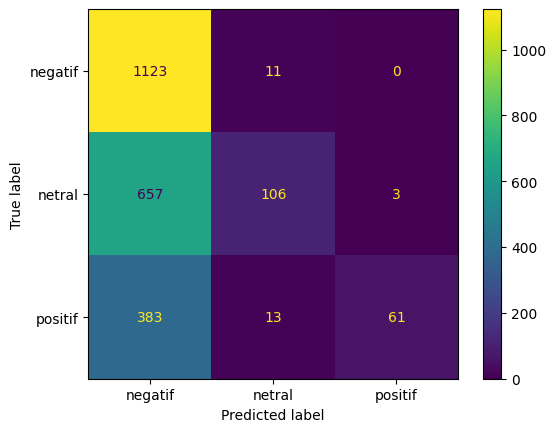

In [ ]:
#@title plotting confussion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = df_preprocessed['label'].unique().tolist())
cm_display.plot()
plt.show()

## Decision Tree Dan Naive Bayes pada formasi Split Data 60%:40%
Ini adalah percobaan komparasi antara algoritma decision tree dan naive bayes pada formasi split data 60:40 atau data training 60% dari dataset sedangkan data test 40% dari dataset

### membagi data train dan data test

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_preprocessed[fitur + "_Filtering"],df_preprocessed[label],
                                                   test_size=0.4, stratify=df_preprocessed[label], random_state=0)

### pembobotan TFID

In [ ]:
#@title inisiasi pembobotan tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [ ]:
#@title pembobotan TFIDF pada x_train dan x_test
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_test.shape)
print(x_test.shape)

(3142, 9555)
(3142, 9555)


In [ ]:
x_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Decision Tree

In [ ]:
#@title training model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#@title prediksi x_test yang ditampung ke y_pred
y_pred = tree.predict(x_test)

In [ ]:
algo = ["Decision Tree", "Naive Bayes"]
split_data_form = {
    "80:20" : 0,
    "70:30" : 1,
    "60:40" : 2
}
df_eval['Akurasi ' + algo[0]][split_data_form["60:40"]] = accuracy_score(y_test, y_pred)

<ipython-input-60-4f01bfc440ad>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Akurasi ' + algo[0]][split_data_form["60:40"]] = accuracy_score(y_test, y_pred)


In [ ]:
print('Akurasi Decision Tree : %s ' %accuracy_score(y_test, y_pred))

Akurasi Decision Tree : 0.5846594525779758 


In [ ]:
#@title evaluasi model
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[944 352 216]
 [302 589 129]
 [183 123 304]]
              precision    recall  f1-score   support

     negatif       0.66      0.62      0.64      1512
      netral       0.55      0.58      0.57      1020
     positif       0.47      0.50      0.48       610

    accuracy                           0.58      3142
   macro avg       0.56      0.57      0.56      3142
weighted avg       0.59      0.58      0.59      3142



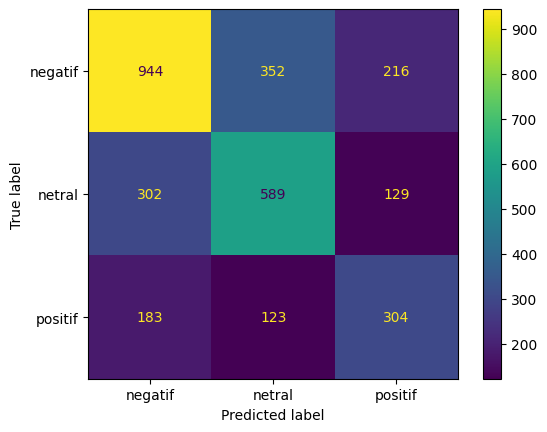

In [ ]:
#@title plotting confussion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = df_preprocessed['label'].unique().tolist())
cm_display.plot()
plt.show()

### Naive Bayes

In [ ]:
#@title training model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
#@title prediksi x_test yang ditampung ke y_pred
y_pred = nb.predict(x_test)

In [ ]:
algo = ["Decision Tree", "Naive Bayes"]
split_data_form = {
    "80:20" : 0,
    "70:30" : 1,
    "60:40" : 2
}
df_eval['Akurasi ' + algo[1]][split_data_form["60:40"]] = accuracy_score(y_test, y_pred)

<ipython-input-66-b96c92ba1d57>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['Akurasi ' + algo[1]][split_data_form["60:40"]] = accuracy_score(y_test, y_pred)


In [ ]:
print('Akurasi Naive Bayes : %s ' %accuracy_score(y_test, y_pred))

Akurasi Naive Bayes : 0.5467854869509866 


In [ ]:
#@title evaluasi model
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[1492   20    0]
 [ 872  145    3]
 [ 509   20   81]]
              precision    recall  f1-score   support

     negatif       0.52      0.99      0.68      1512
      netral       0.78      0.14      0.24      1020
     positif       0.96      0.13      0.23       610

    accuracy                           0.55      3142
   macro avg       0.76      0.42      0.38      3142
weighted avg       0.69      0.55      0.45      3142



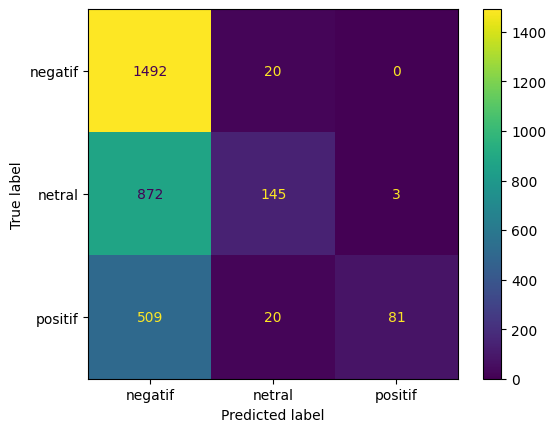

In [ ]:
#@title plotting confussion matrix
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = df_preprocessed['label'].unique().tolist())
cm_display.plot()
plt.show()

## Tabel Komparasi Akurasi

In [ ]:
df_eval

,split_data,Akurasi Decision Tree,Akurasi Naive Bayes
0,80:20,0.599618,0.551878
1,70:30,0.582944,0.547306
2,60:40,0.584659,0.546785
